In [1]:
t_max = 150e-3   # second
dt = 1e-3        # second
tau = 20e-3      # second
el = -60e-3      # milivolt
vr = -70e-3      # milivolt
vth = -50e-3     # milivolt
r = 100e6        # ohm
i_mean = 25e-11  # ampere

# Simulating input current :
Synaptic input I(t) is in sinusoidal form.

    I(t)=Imean(1+sin(2πt/0.01))

Simulate in between t = 0 to t = 0.009

In [2]:
import numpy as np
import matplotlib.pyplot as plt

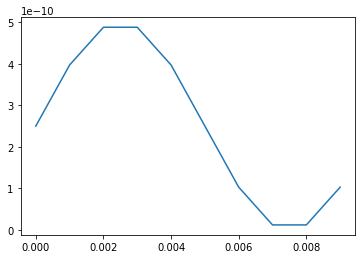

In [3]:
# Plain simulation:
t = np.array( [x*dt for x in range(10)] ,dtype=float)
i = i_mean*(1+np.sin(2*np.pi*t/0.01))
plt.plot(t,i)
plt.show()

# Simulating Barrier potential using Euler's method

Barrier Potential:
$$ {τ_{m} V(t+Δt)−V(t) \over Δt} = E_{l}−V(t)+RI(t) $$

Eulers method:

Forward $$ y_{n+1} = y_{n} + h f(t_{n},y_{n}) $$

Backward $$ y_{n+1} = y_{n} + h f(t_{n+1},y_{n+1}) $$

Barrier Potential in forward euler form:
$$ V_{n+1} = V_{n} +  {Δt\over {τ_{m}}} (E_{l}−V_{n}+RI{n}) $$

Boundary Condition: $$ t = 0 : V(0) = E_{l}$$

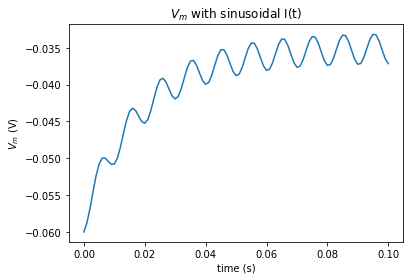

In [4]:
t = np.array( [x*dt for x in range(101)] ,dtype=float)
i = i_mean*(1+np.sin(2*np.pi*t/0.01))
plt.figure()
plt.title('$V_m$ with sinusoidal I(t)')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')
v = [el]
for ind , ti in enumerate(t):
    if ind == 0:
        continue
    v.append(v[-1] + dt/tau*(el-v[-1]+ r*i[ind-1] ))
v = np.array(v ,dtype=float)
plt.plot(t,v)
plt.show()


# Random Synamptic Input:

$$ I(t) = I_{mean} (1 + 0.1 \sqrt{t_{max}\over {Δt}} ξ(t)) \quad with \ ξ(t) ~ U(−1,1)$$ 


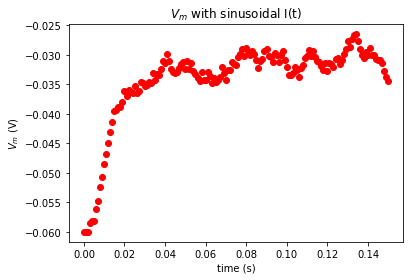

In [5]:
np.random.seed(2022)
plt.figure()
plt.title('$V_m$ with sinusoidal I(t)')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')
step_end = int(t_max/dt)
v = [el]
i = [0]
t = [0]
for step in range(step_end):
    new_i = i_mean*(1+ 0.1*np.sqrt(t_max/dt)*np.random.random()*2-1)
    new_t = t[-1] + dt
    new_v = v[-1] + dt/tau*(el-v[-1]+ r*i[-1])
    v.append(new_v)
    t.append(new_t)
    i.append(new_i)
plt.plot(t,v,'ro')
plt.show()

# Ensemble statistics

We will repeat the random synaptic input for N times over a fixed range of time.
We will also be plotting Ensemble along with mean ans standard deviations
 

In [6]:
N = 10000                   # Total realisations
step_end = int(t_max/dt)    # Total steps in one simulation

In [7]:
# collection of measured quantites over whole ensemble 
I = np.zeros((N,step_end)) 
V = np.zeros((N,step_end))
T = np.zeros((step_end))
for i in range(N):
    V[i][0] = el

for t in range(1,step_end):
    T[t] = T[t-1] + dt


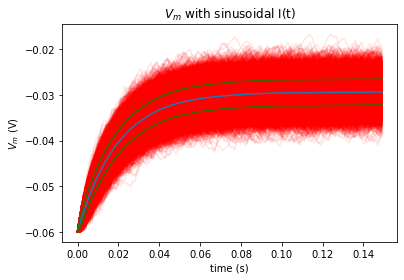

In [8]:

plt.figure()
plt.title('$V_m$ with sinusoidal I(t)')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

I = i_mean*(1+ 0.1*np.sqrt(t_max/dt)*np.random.random([N,step_end])*2-1)
for step in range(step_end):
    if step == 0:
        continue
    V[:,step] = V[:,step-1] + dt/tau*(el-V[:,step-1]+ r*I[:,step-1])
    
for n in range(N):
    plt.plot(T,V[n],'r',alpha=0.1,markersize=1)

v_mean = V.mean(axis=0)
v_sd = V - v_mean
v_sd = np.power(v_sd,2)
v_sd = v_sd.mean(axis=0)
v_sd = np.power(v_sd,0.5)
v_psd = v_mean + v_sd
v_nsd = v_mean - v_sd
plt.plot(T,v_mean,markersize=5)
plt.plot(T,v_psd,'g', alpha=0.8, markersize=2)
plt.plot(T,v_nsd,'g', alpha=0.8, markersize=2)
plt.show()

Histograms of the N realisations of V(t) i.e. barrier potential at t = t_max and t = t_max/10
 

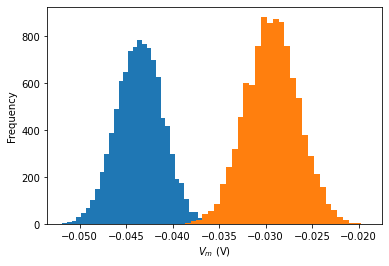

In [9]:
plt.figure()
plt.ylabel('Frequency')
plt.xlabel('$V_m$ (V)')
i = 0
tx = 0
while tx < t_max/10:
    tx += dt
    i += 1
plt.hist(V[:, i],32, histtype='stepfilled',linewidth=0)
plt.hist(V[:, -1],32, histtype='stepfilled',linewidth=0)

plt.show()

Introducing Spikes


In [11]:
'''
Helper Plotting function
'''
def plot_all(T, V, raster=None):
    v_mean = V.mean(axis=0)
    v_sd = V - v_mean
    v_sd = np.power(v_sd,2)
    v_sd = v_sd.mean(axis=0)
    v_sd = np.power(v_sd,0.5)
    v_psd = v_mean + v_sd
    v_nsd = v_mean - v_sd

    N = V.shape[0]
    plt.figure()
    ax1 = plt.subplot(3,1,1)

    for n in range(N):
        plt.scatter(T/dt,V[n],color="k", marker=".", alpha=0.01)
    plt.plot(T/dt, v_mean, 'C1', alpha=0.8, linewidth=3)
    plt.ylabel('$V_m$ (V)')

    spikes_mean = np.mean(raster,axis=0)
    # Plot firing rate
    plt.subplot(3, 1, 2, sharex=ax1)
    plt.plot(T/dt, spikes_mean)
    plt.xlabel('time (s)')
    plt.ylabel('rate (Hz)')
    # Plot spikes
    plt.tight_layout()
    plt.subplot(3, 1, 3, sharex=ax1)
    plt.imshow(raster,cmap='Greys', origin='lower', aspect='auto')


  


    
    

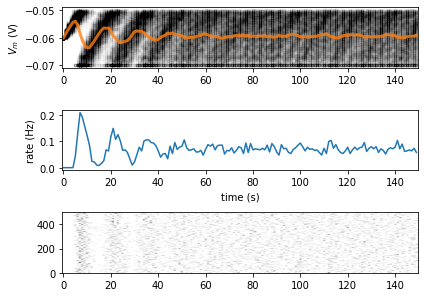

In [11]:
N = 500                     # Total realisations
step_end = int(t_max/dt)    # Total steps in one simulation
I = np.zeros((N,step_end)) 
V = np.zeros((N,step_end))
T = np.array([t*dt for t in range(step_end)])
raster = np.zeros([N,step_end])


for i in range(N):
    V[i][0] = el

I = i_mean*(1+ 0.1*np.sqrt(t_max/dt)*np.random.random([N,step_end])*2-1)
for step, t in enumerate(T):
    if step == 0:
        continue
    V[:,step] = V[:,step-1] + dt/tau*(el-V[:,step-1]+ r*I[:,step-1])
    spiked = V[:, step] >= vth
    V[spiked,step] = vr
    raster[spiked, step] = 1


plot_all(T,V,raster=raster)



Simulating (absolute) Refactory period after spiking of neuron

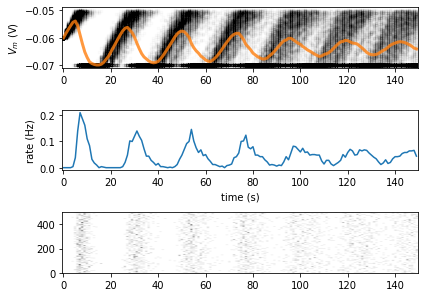

In [12]:
N = 500                     # Total realisations
step_end = int(t_max/dt)    # Total steps in one simulation
I = np.zeros((N,step_end)) 
V = np.zeros((N,step_end))
T = np.array([t*dt for t in range(step_end)])
raster = np.zeros([N,step_end])

# Initialize t_ref and last_spike
t_ref = 0.01
last_spike = -t_ref * np.ones([N])

for i in range(N):
    V[i][0] = el

I = i_mean*(1+ 0.1*np.sqrt(t_max/dt)*np.random.random([N,step_end])*2-1)
for step, t in enumerate(T):
    if step == 0:
        continue
    V[:,step] = V[:,step-1] + dt/tau*(el-V[:,step-1]+ r*I[:,step-1])
    spiked = V[:, step] >= vth
    V[spiked,step] = vr
    raster[spiked, step] = 1

    clamped = (t-last_spike) < t_ref 
    V[clamped, step] = vr
    last_spike[spiked] = t


plot_all(T,V,raster=raster)

Simulating Random refractory period.

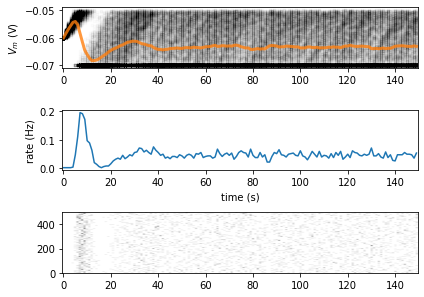

In [13]:

N = 500                     # Total realisations
step_end = int(t_max/dt)    # Total steps in one simulation
I = np.zeros((N,step_end)) 
V = np.zeros((N,step_end))
T = np.array([t*dt for t in range(step_end)])
raster = np.zeros([N,step_end])

# Initialize t_ref and last_spike
mu = 0.01
sig = 0.007
t_ref = np.random.normal(mu,sig,size=(N))
np.clip(t_ref,0,None)
last_spike = -t_ref * np.ones([N])

for i in range(N):
    V[i][0] = el

I = i_mean*(1+ 0.1*np.sqrt(t_max/dt)*np.random.random([N,step_end])*2-1)
for step, t in enumerate(T):
    if step == 0:
        continue
    V[:,step] = V[:,step-1] + dt/tau*(el-V[:,step-1]+ r*I[:,step-1])
    spiked = V[:, step] >= vth
    V[spiked,step] = vr
    raster[spiked, step] = 1

    clamped = (t-last_spike) < t_ref 
    V[clamped, step] = vr
    last_spike[spiked] = t


plot_all(T,V,raster=raster)

Ran for 0.15s in 150 steps.


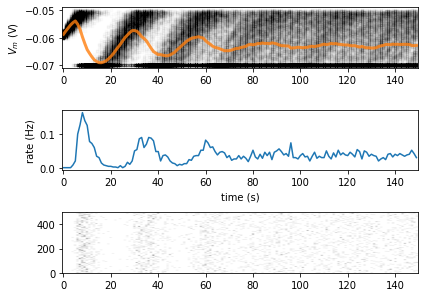

In [14]:
from LIFNeuron import LIFNeurons
# Set random number generator
np.random.seed(2020)

# Initialize step_end, t_range, n, v_n and i
t_range = np.arange(0, t_max, dt)
step_end = len(t_range)
n = 500
v_n = el * np.ones([n, step_end])
i = i_mean * (1 + 0.1 * (t_max / dt)**(0.5) * (2 * np.random.random([n, step_end]) - 1))

# Initialize binary numpy array for raster plot
raster = np.zeros([n,step_end])

# Initialize neurons
neurons = LIFNeurons(n)

# Loop over time steps
for step, t in enumerate(t_range):

  # Call ode_step method
  neurons.ode_step(dt, i[:,step])

  # Log v_n and spike history
  v_n[:,step] = neurons.v
  raster[neurons.spiked, step] = 1.

# Report running time and steps
print(f'Ran for {neurons.t:.3}s in {neurons.steps} steps.')

# Plot multiple realizations of Vm, spikes and mean spike rate
plot_all(t_range, v_n, raster)